In [147]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%reload_ext autoreload
%autoreload 2

# Global settings for plots

# Set global figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Set the global default figure facecolor to white
plt.rcParams['figure.facecolor'] = 'white'

# Set global font size
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
#mpl.rcParams['legend.fontsize'] = 'large'

# Set the default legend marker size globally
plt.rcParams['legend.markerscale'] = 2

# Increase title to plot distance
plt.rcParams['axes.titley'] = 1.05

# Set the colormap globally
plt.set_cmap('cividis')

# Set the color cycle to include 10 easily distinguishable colors
plt.style.use('tableau-colorblind10')

<Figure size 2000x1000 with 0 Axes>

In [50]:
from cmb import blackbody_tester, plot 
# FIXME: remove temporary import
from cmb import blackbody

# CMB Workshop

### Table of Contents

1. [Introduction](#introduction)  
    1.1 [The Cosmic Microwave Background](#the-cosmic-microwave-background-cmb): What secrets does the universe's oldest light hold?  
    1.2 [Activity Overview](#activity-overview): How do we uncover the cosmos' earliest mysteries?  
2. [Understanding Cosmic Light](#understanding-cosmic-light)  
    2.1 [Black Body Radiation](#black-body-radiation): How do objects in space emit light?  
    2.2 [Peak Wavelength and Wien’s Law](#peak-wavelength-and-wiens-law): What does a star's color reveal?
3. [Expansion of the Universe](#expansion-of-the-universe)  
    3.1 [Redshifting and the Doppler Effect](#redshift-and-the-doppler-effect): How do we know the universe is expanding?  
    3.2 [Analyzing COBE Data Spectrum](#analyzing-cobe-data-spectrum): What can ancient light tell us?  


## Introduction

### The Cosmic Microwave Background (CMB)

### Activity Overview

## Understanding Cosmic Light

### Black Body Radiation

Black body radiation is a fundamental concept in physics that describes the spectrum of light emitted by an idealized, perfect emitter of radiation. This theoretical construct, known as a "black body," absorbs all incident electromagnetic radiation, regardless of frequency or angle, and re-emits it in a characteristic spectrum that depends only on the body's temperature. This phenomenon is critical in various fields, including astrophysics, where it helps in understanding celestial objects' thermal properties and the Cosmic Microwave Background (CMB).

The spectral radiance of a black body, which is the power emitted per unit area per unit solid angle per unit wavelength, can be quantitatively described by Planck's law. Expressed in terms of wavelength ($\lambda$) and in SI units, Planck's law is given by:

$B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda kT}\right) - 1}$


with the spectral radiance $B(\lambda, T)$ given in units of $W \cdot m^{-2} \cdot sr^{-1} \cdot m^{-1}$. Here:
* $h$ is the Planck constant ($6.626 \times 10^{-34}$ J s)
* $c$ is the speed of light in a vacuum ($3.00 \times 10^8$ m/s)
* $k$ is the Boltzmann constant ($1.381 \times 10^{-23}$ J/K)
* $T$ is the absolute temperature of the black body in Kelvin (K)
* $\lambda$ is the wavelength in meters (m).

##### Optional Challenge: Write your own implementation of Planck's Law:

In [51]:
# TODO: consider adding a warm-up exercise about Python calculations: exponents, division, etc

def blackbody_radiation_law(wavelength, temp):
    """
    Your implementation of the black body radiation law equation using wavelength in meters.
    
    Parameters:
    - wavelength: Wavelength of the radiation (in meters).
    - temp: Temperature of the black body (in Kelvin).
    
    Returns:
    - Spectral radiance of the black body (in W/m^2/sr/nm). Return None by default as a placeholder.
    """
    # Reminder of the Planck's law formula in SI units:
    # B(lambda, T) = (2hc^2 / lambda^5) * 1 / (exp(hc / (lambda kT)) - 1)
    # where h = 6.626e-34 (J·s), c = 3e8 (m/s), k = 1.381e-23 (J/K),
    # lambda is in meters, and T is in Kelvin.

    # Hint: In Python, use '**' to denote exponentiation. For example, c squared is written as c**2.
    # NumPy's exp function (np.exp) is used for exponential calculations. For e^x, you write np.exp(x).

    # Your implementation here.

    # Remember to return your calculated spectral radiance.

    # FIXME: remove temporary implementation
    return blackbody.radiation_law_wavelength(wavelength, temp)

    #return None

In [99]:
# Test the student's function
print(blackbody_tester.test_blackbody_radiation_law(blackbody_radiation_law))

All tests passed! Your implementation appears to be correct.


#### Visualizing the Black Body Radiation

In [83]:
wavelengths = np.linspace(100e-9, 2000e-9, 100) # 100 points from 100 nm to 2000 nm

# TODO: add a dropdown for reference values instead of hardcoding the Sun
plot.interactive_blackbody_radiation(wavelengths, blackbody_radiation_law)

interactive(children=(FloatSlider(value=5778.0, description='Temp (K):', max=10000.0, min=1000.0, readout_form…

##### Think and Reflect:
1. What changes do you notice in the curve when the temperature is increased? 
2. How about when it is decreased?

### Peak Wavelength and Wien's Law

After exploring the black body radiation curves, you've seen how the peak of the radiation curve shifts with changes in temperature. This movement isn't random; it's described by Wien's Displacement Law. Wien's Law tells us the wavelength at which the radiation from a black body (like a star, including our Sun) is most intense, and this wavelength is inversely related to the temperature of the body.

Wien's Law can be stated mathematically as:

$\lambda_{\text{max}} = \frac{b}{T}$

where:
- $\lambda_{\text{max}}$ is the peak wavelength — the wavelength at which the emission is strongest,
- $T$ is the absolute temperature of the black body (in Kelvin),
- $b$ is Wien's displacement constant, approximately $2.897 \times 10^{-3}$ m·K (meter-Kelvin).

This law reveals an important insight: as a black body gets hotter, its peak emission shifts to shorter wavelengths. This is why, for example, a heating metal glows red and then white as its temperature increases.

#### Practical Implication

In astronomy, Wien's Law enables us to determine the surface temperature of stars by observing the color of the light they emit. A star emitting peak radiation at shorter wavelengths (more towards the blue end of the spectrum) is hotter than a star emitting peak radiation at longer wavelengths (more towards the red end of the spectrum).

#### Optional Challenge: Implementing Wien's Law

Let’s implement Wien's Law to calculate the peak wavelength for a given temperature.

In [56]:
def peak_wavelength(temp):
    """
    Your implementation of Wien's Law to calculate the peak wavelength.
    
    Parameters:
    - temp: The absolute temperature of the black body (in Kelvin).
    
    Returns:
    - The peak wavelength (in meters). Return None by default as a placeholder.
    """
    # Reminder the Wien's displacement constant is:
    # b = 2.897e-3  (meter-Kelvin)

    # Your implementation here.

    # Remember to return your calculated peak wavelength

    # FIXME: remove temporary implementation
    return blackbody.peak_wavelength(temp)

    #return None


In [76]:
# Test the student's function
print(blackbody_tester.test_peak_wavelength(peak_wavelength))

All tests passed! Your implementation appears to be correct.


#### Visualizing the Peak Wavelength

In [98]:
# TODO: add UV, visible and infrared bands
plot.interactive_peak_wavelength(wavelengths, blackbody_radiation_law, peak_wavelength)

interactive(children=(FloatSlider(value=5778.0, description='Temp (K):', max=10000.0, min=1000.0, readout_form…

##### Think and Reflect:
1. What happens to the peak wavelength when the temperature is decreased? How might this affect the appearance of a star as it cools down?
2. Can you think of everyday examples where changes in temperature lead to changes in color similar to those described by Wien's Law?

## Expansion of the Universe

### Redshift and the Doppler Effect

In [87]:
#TODO

### Analyzing COBE Data Spectrum

In [139]:
#−0.04, 2.26, −42.32, 284.54, −248.09
plot.interactive_cobe_polynomial_fit()

interactive(children=(FloatSlider(value=-0.05, description='a: x^4', max=0.0, min=-0.05, step=0.01), FloatSlid…

[ 1.78769556e-03 -1.46392416e-01  4.55657266e+00 -6.50189418e+01
  3.82932003e+02 -3.92622238e+02]


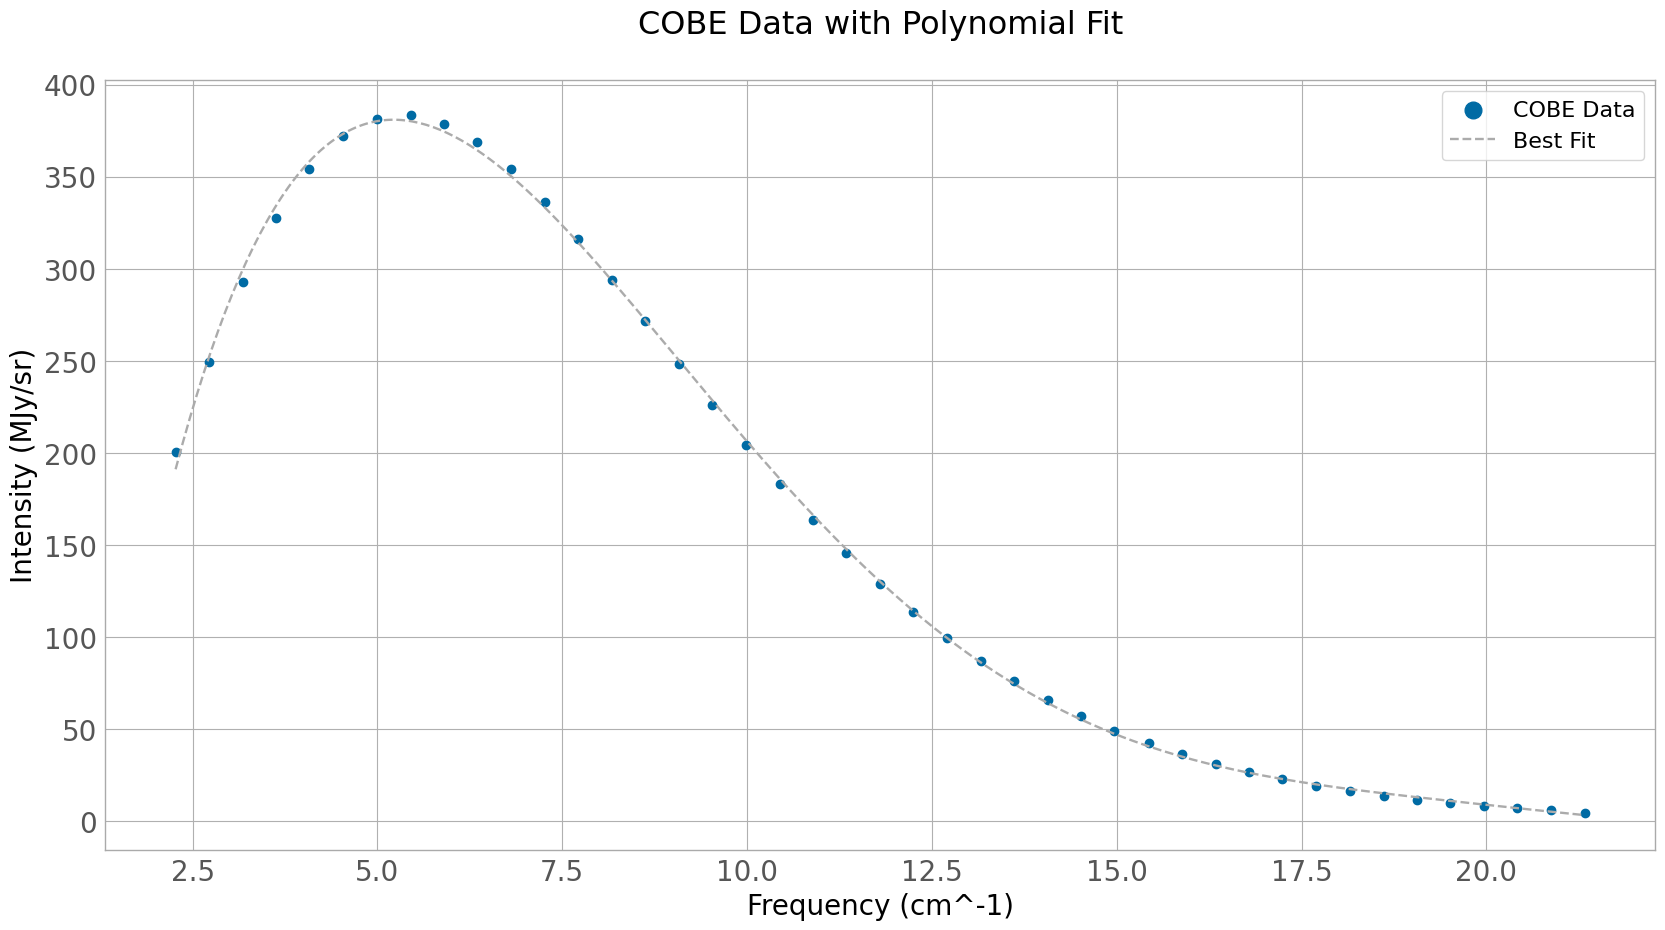

In [140]:
plot.cobe_data_with_fit(None, True)

In [160]:
plot.interactive_polynomial_degree_selector()

interactive(children=(IntSlider(value=1, description='Polynomial Degree', max=5, min=1, style=SliderStyle(desc…